In [1]:
!pip install ripser seaborn


[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: C:\Users\buddh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ripser import Rips
import persim
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize, MinMaxScaler
# Define stock labels with their corresponding date ranges and stock tickers
stock_data = {
    "V shaped recovery": {
        "stocks": [ 'CI', 'DXCM', 'NFLX', 'CTLT', 'MRK', 'TMO', 'ABT', 'DHR', 'JNJ','NEULANDLAB.NS', 'SUNPHARMA.NS','COROMANDEL.NS', 'TORNTPHARM.NS', 'CIPLA.NS', 'ZYDUSLIFE.NS', 'PFIZER.NS', 'LUPIN.NS', 'BRITANNIA.NS', 'DABUR.NS', 'DABUR.NS', 'ABBOTINDIA.NS', 'AUROPHARMA.NS', 'BIOCON.NS', 'DRREDDY.NS', 'GRANULES.NS', 'LAURUSLABS.NS', 'SYNGENE.NS', 'NATCOPHARM.NS', 'SANOFI.NS', 'AJANTPHARM.NS', 'APLLTD.NS', 'IGL.NS', 'RELIANCE.NS', 'MUTHOOTFIN.NS', 'DEN.NS', 'BALAJITELE.NS','FILATEX.NS','COROMANDEL.NS'],
        "start": "2020-01-01",
        "end": "2020-05-30"
    },
    "U shaped recovery": {
        "stocks": ['IFCI.NS','SWANENERGY.NS','PGEL.NS','GPPL.NS','ECLERX.NS','BLUEDART.NS','EIDPARRY.NS','LTF.NS','ABB.NS','DHANI.NS', 'ADANIENT.NS','PAISALO.NS', 'UBL.NS', 'SAREGAMA.NS', 'ASHOKLEY.NS', 'BOSCHLTD.NS', 'EICHERMOT.NS', 'GLENMARK.NS', 'AMBER.NS', 'STAR.NS', 'IPCALAB.NS', 'VGUARD.NS', 'WHIRLPOOL.NS', 'PFC.NS','SARLAPOLY.NS'],
        "start": "2020-01-01",
        "end": "2020-11-30"
    },
    "W shaped recovery": {
        "stocks": ['SOUTHBANK.NS','SHANTIGEAR.NS','POLYMED.NS','WOCKPHARMA.NS','BBTC.NS', 'HBLPOWER.NS','UCOBANK.NS', 'PSB.NS', 'CENTRALBK.NS', 'JBCHEPHARM.NS', 'SOLARA.NS', 'GTPL.NS', 'PFE','CENTRUM.NS','MADRASFERT.NS','ASHIMASYN.NS'],
        "start": "2020-01-01",
        "end": "2020-06-30"
    },
    "Swoosh shaped recovery": {
        "stocks": [ 'BSOFT.NS','HEROMOTOCO.NS','PEL.NS', 'RAMCOCEM.NS','M&M.NS', 'TFCILTD.NS', 'BAJAJCON.NS', 'GODREJCP.NS', 'ICICIBANK.NS', 'HDFCBANK.NS', 'IDFCFIRSTB.NS', 'FEDERALBNK.NS', 'CANBK.NS', 'BALRAMCHIN.NS', 'COLPAL.NS', 'RADICO.NS', 'TATACONSUM.NS', 'VBL.NS', 'NETWORK18.NS', 'TV18BRDCST.NS', 'APOLLOTYRE.NS', 'BAJAJ-AUTO.NS', 'MARUTI.NS', 'CROMPTON.NS', 'VEDL.NS', 'KAJARIACER.NS', 'TITAN.NS', 'INFY.NS', 'HCLTECH.NS', 'TCS.NS', 'TECHM.NS'],
        "start": "2020-01-01",
        "end": "2021-01-01"
    }
}


In [19]:

# Extract stock indices, labels, and date ranges
index_names = []
labels = []
date_ranges = {}

for label, data in stock_data.items():
    index_names.extend(data["stocks"])
    labels.extend([label] * len(data["stocks"]))
    for stock in data["stocks"]:
        date_ranges[stock] = (data["start"], data["end"])

# Function to normalize a dataframe column
#def normalize(df, column):
 #   return df[column] / df[column].max()

# Function to create delay embedding
def delay_embedding(data, dimension, lag):
    n_points = len(data) - (dimension - 1) * lag
    if n_points <= 0:
        raise ValueError("Time series is too short for the given dimension and lag")
    embedded_data = np.empty((n_points, dimension))
    for i in range(n_points):
        embedded_data[i] = data[i:i + dimension * lag:lag]
    return embedded_data

# Parameters for delay embedding
embedding_dimension = 3  
embedding_lag = 1  

# Instantiate Vietoris-Rips solver
rips = Rips(maxdim=2)

# Initialize a list to store diagrams for each stock
all_diagrams = []

# Iterate over each stock and download data based on label-specific date ranges
for stock, label in zip(index_names, labels):
    start_date_string, end_date_string = date_ranges[stock]

    # Pull data from Yahoo Finance
    raw_data = yf.download(stock, start=start_date_string, end=end_date_string)

    # Normalize 'Adj Close' column
    raw_data['Adj Close'] = normalize(raw_data[['Adj Close']].values, axis=0)

    # Prepare data using delay embedding
    embedded_data = delay_embedding(raw_data['Adj Close'].values.flatten(), embedding_dimension, embedding_lag)

    # Compute the persistence diagram
    dgm = rips.fit_transform(embedded_data)
    all_diagrams.append(dgm)

# Compute Wasserstein distances between all pairs of persistence diagrams
num_stocks = len(index_names)
wasserstein_dists = np.zeros((num_stocks, num_stocks))

for i in range(num_stocks):
    for j in range(num_stocks):
        if i != j:
            wasserstein_dists[i, j] = persim.wasserstein(all_diagrams[i][0], all_diagrams[j][0], matching=False)



Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[******************

C:\Users\buddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\persim\wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
C:\Users\buddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\persim\wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
C:\Users\buddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\persim\wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
C:\Users\buddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\persim\wasserstein.py:61: UserWarning: dgm2 has points with non-finite death t

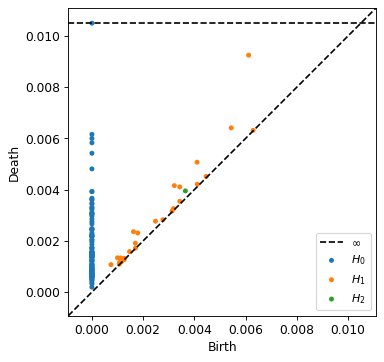

In [20]:
plt.figure(figsize=(5, 5), dpi=80)
plt.rcParams.update({'font.size': 11})
persim.plot_diagrams(all_diagrams[75], title="")

In [7]:
wasserstein_dists.shape

(110, 110)

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
# Ensure you have multi-class labels instead of binary labels
labels = labels

# Split the data into training and testing sets based on indices
num_stocks = wasserstein_dists.shape[0]
indices = np.arange(num_stocks)
X_train_indices, X_test_indices, y_train, y_test = train_test_split(indices, labels, test_size=0.20, random_state=17)

# Create the training and testing distance matrices
X_train = sc.fit_transform(wasserstein_dists[np.ix_(X_train_indices, X_train_indices)])
X_test = sc.transform(wasserstein_dists[np.ix_(X_test_indices, X_train_indices)]) 


# Use GridSearchCV to find the optimal value of k
param_grid = {'n_neighbors': np.arange(1, 10),
              "weights": ["uniform", "distance"],
  }
knn = KNeighborsClassifier(metric='precomputed')
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# Print the optimal value of k
optimal_k = knn_cv.best_params_['n_neighbors']
print(f"Optimal k: {optimal_k}")

# Use the optimal value of k to train the final model
knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='precomputed')
knn.fit(X_train, y_train) 

# Predict and evaluate the classifier on the test set
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Optimal k: 5
Accuracy: 1.00


In [12]:
X_train_indices

array([ 58,  69,  62,  11,  28,  97,  14,  48,  83,  90,  78,  33,  82,
        92,  80,  53,  25,  85,  77,  21,  40,  98,  76,  19,  35, 102,
        29,  73,  36,  66,  67,  20,  12,   0,  70,  59,  24,  72,  79,
        93,  46, 109,  87,  75,  26,  91,  74,  51,   8,  60, 100,  50,
        27,  94,  13,  54,  99,   2,  89,   5,  61,  32,  49,  96,  30,
       106,  95,  38, 108,  63,   3,  10,  56,  41,  17,   1,   7,  44,
        84,  39,  68,  31, 107,  45,  57,  22,   6,  15])

In [10]:
y_train

['U shaped recovery',
 'W shaped recovery',
 'U shaped recovery',
 'V shaped recovery',
 'V shaped recovery',
 'Swoosh shaped recovery',
 'V shaped recovery',
 'U shaped recovery',
 'Swoosh shaped recovery',
 'Swoosh shaped recovery',
 'W shaped recovery',
 'V shaped recovery',
 'Swoosh shaped recovery',
 'Swoosh shaped recovery',
 'Swoosh shaped recovery',
 'U shaped recovery',
 'V shaped recovery',
 'Swoosh shaped recovery',
 'W shaped recovery',
 'V shaped recovery',
 'U shaped recovery',
 'Swoosh shaped recovery',
 'W shaped recovery',
 'V shaped recovery',
 'V shaped recovery',
 'Swoosh shaped recovery',
 'V shaped recovery',
 'W shaped recovery',
 'V shaped recovery',
 'W shaped recovery',
 'W shaped recovery',
 'V shaped recovery',
 'V shaped recovery',
 'V shaped recovery',
 'W shaped recovery',
 'U shaped recovery',
 'V shaped recovery',
 'W shaped recovery',
 'Swoosh shaped recovery',
 'Swoosh shaped recovery',
 'U shaped recovery',
 'Swoosh shaped recovery',
 'Swoosh shaped 

In [11]:
X_test_indices

array([ 81,  52,  86,  64,   9,  43, 101,  23, 103, 104,  42,  88,  16,
       105,  71,  65,   4,  55,  47,  37,  18,  34])

In [22]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from ripser import Rips
import persim

# Define embedding dimension and lag
embedding_dimension = 3
embedding_lag = 1

# Initialize Rips object
rips = Rips()
mms = MinMaxScaler()

# Function to create delay embedding
def delay_embedding(data, dimension, lag):
    n_points = len(data) - (dimension - 1) * lag
    if n_points <= 0:
        raise ValueError("Time series is too short for the given dimension and lag")
    embedded_data = np.empty((n_points, dimension))
    for i in range(n_points):
        embedded_data[i] = data[i:i + dimension * lag:lag]
    return embedded_data

# Function to predict labels for new stocks
def predict_new_stocks(new_stocks, start_date, end_date, knn, all_diagrams):
    new_diagrams = []
    for stock in new_stocks:
        raw_data = yf.download(stock, start=start_date, end=end_date)
        raw_data['Adj Close'] = normalize(raw_data[['Adj Close']].values, axis=0)
        embedded_data = delay_embedding(raw_data['Adj Close'].values.flatten(), embedding_dimension, embedding_lag)
        dgm = rips.fit_transform(embedded_data)
        new_diagrams.append(dgm)

    num_new_stocks = len(new_stocks)
    num_existing_stocks = len(all_diagrams)
    new_wasserstein_dists = np.zeros((num_new_stocks, num_existing_stocks))

    for i in range(num_new_stocks):
        for j in range(num_existing_stocks):
            if new_diagrams[i] and all_diagrams[j]:  
                new_wasserstein_dists[i, j] = persim.wasserstein(new_diagrams[i][0], all_diagrams[j][0], matching=False)
                #new_wasserstein_dists[i, j] = max(distance, 0)  

    # Scale the distance matrix
    new_wasserstein_dists = mms.fit_transform(new_wasserstein_dists)
    
    # Predict the labels for the new stocks using the new Wasserstein distances
    new_predictions = knn.predict(new_wasserstein_dists)
    return new_predictions

# Example usage:
test_stocks = ['TANLA.NS','ASTRAZEN.NS','VRTX', 'MANH', 'PODD', 'SRPT', 'ORCL', 'CELH', 'ZBRA', 'HATHWAY.NS', 'PFOCUS.NS', 'EROSMEDIA.NS', 'ALKEM.NS', 'HINDUNILVR.NS', 'ENPH', 'ADBE', 'AMAT', 'SSNC', 'BALKRISIND.NS']
test_start_date = "2020-01-01"
test_end_date = "2020-04-01"


num_stocks = num_stocks  
wasserstein_dists = wasserstein_dists 
all_diagrams = all_diagrams 
labels = labels  

# Ensure no negative values are present
if np.any(wasserstein_dists < 0):
    raise ValueError("Negative values detected in Wasserstein distances")

# Scale the training distance matrix
wasserstein_dists = mms.fit_transform(wasserstein_dists)
X_train = wasserstein_dists 

# Initialize and fit the KNN classifier with the precomputed distance matrix and labels
knn = KNeighborsClassifier(n_neighbors=optimal_k,weights='distance', metric='precomputed')
knn.fit(X_train, labels)

# Predict labels for new stocks
predictions = predict_new_stocks(test_stocks, test_start_date, test_end_date, knn, all_diagrams)

# Convert the predictions array to a list
predictions = predictions.tolist()
print(f"predictions: {predictions}")


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[******************

C:\Users\buddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\persim\wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
C:\Users\buddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\persim\wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
C:\Users\buddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\persim\wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
C:\Users\buddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\persim\wasserstein.py:61: UserWarning: dgm2 has points with non-finite death t

predictions: ['V shaped recovery', 'V shaped recovery', 'Swoosh shaped recovery', 'W shaped recovery', 'Swoosh shaped recovery', 'V shaped recovery', 'V shaped recovery', 'W shaped recovery', 'V shaped recovery', 'W shaped recovery', 'V shaped recovery', 'V shaped recovery', 'Swoosh shaped recovery', 'Swoosh shaped recovery', 'W shaped recovery', 'U shaped recovery', 'W shaped recovery', 'V shaped recovery', 'W shaped recovery']


C:\Users\buddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\persim\wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
C:\Users\buddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\persim\wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
C:\Users\buddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\persim\wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
C:\Users\buddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\persim\wasserstein.py:61: UserWarning: dgm2 has points with non-finite death t

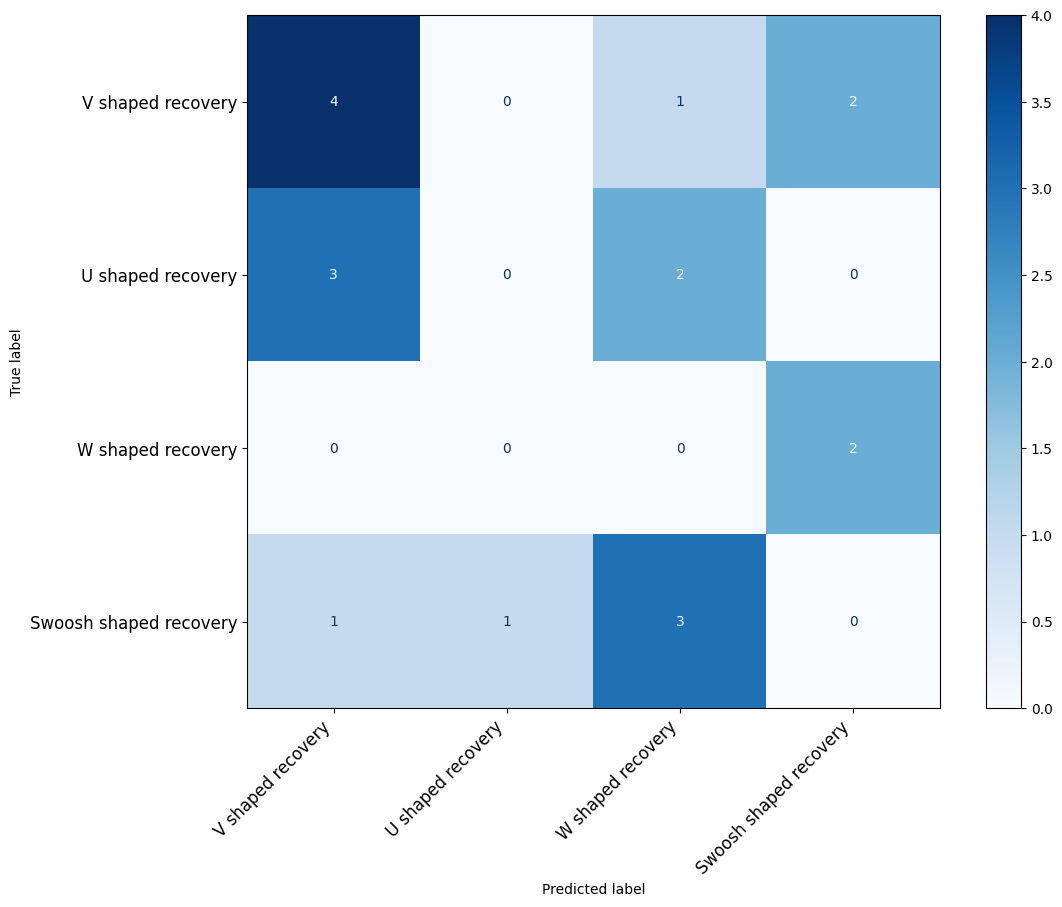

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define your predictions and labels correctly
predictions = predictions
labels = ['V shaped recovery', 'U shaped recovery', 'W shaped recovery', 'Swoosh shaped recovery']

# Disable LaTeX rendering
plt.rcParams['text.usetex'] = False

test_labels = ['V shaped recovery','V shaped recovery','V shaped recovery','V shaped recovery','V shaped recovery','V shaped recovery','V shaped recovery', 
               'U shaped recovery','U shaped recovery','U shaped recovery','U shaped recovery',
               'U shaped recovery','W shaped recovery','W shaped recovery',
               'Swoosh shaped recovery','Swoosh shaped recovery','Swoosh shaped recovery',
               'Swoosh shaped recovery','Swoosh shaped recovery']

# Generate and plot the confusion matrix
cm = confusion_matrix(test_labels, predictions, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 9))  

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Adjust label font size
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)

plt.show()


Predicted class for [[5 5]]: 0
